# Trabalho 05 de Métodos Quantitativos
###### Pedro Henrique Ventura 
###### Aluno de Sistemas Multimídia da Pós Graduação em Ciência da Computação (2019). Terceiro Trimestre
## Bibliotecas

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

[[1.        0.9600254]
 [0.9600254 1.       ]]


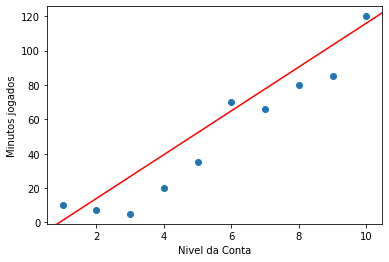

In [177]:
x = [1,2,3,4,5,6,7,8,9,10]#nivel da conta
y = [10,7,5,20,35,70,66,80,85,120]#média de minutos jogados 

xy = [x,y]
r = np.corrcoef(xy)
print(r)
# plot grafico de dispersao

fig, ax = plt.subplots()
line = mlines.Line2D([0, 1], [0, 1], color='red')
line.set_transform(transform)
ax.add_line(line)
plt.xlabel('Nivel da Conta')
plt.ylabel('Minutos jogados')
plt.scatter(x, y)